In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
pwd

'/Users/stellato/Galvanize/capstone_2'

In [3]:
train_path = 'images_tvt_split/train' 
valid_path = 'images_tvt_split/valid'
test_path = 'images_tvt_split/test'

In [4]:
#create keras image data generators for train, validate (valid), and holdout (test) sets. 
# Generate batches of feature augmented images from the generators. 

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size=(224,224), classes=['mask', 'no_mask'], batch_size=20) 

Found 536 images belonging to 2 classes.


In [6]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = valid_path, target_size=(224,224), classes=['mask', 'no_mask'], batch_size=20) 

Found 178 images belonging to 2 classes.


In [7]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path, target_size=(224,224), classes=['mask', 'no_mask'], batch_size=20, shuffle=False) 

Found 178 images belonging to 2 classes.


In [ ]:
# view the images generated from the data generators

In [8]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

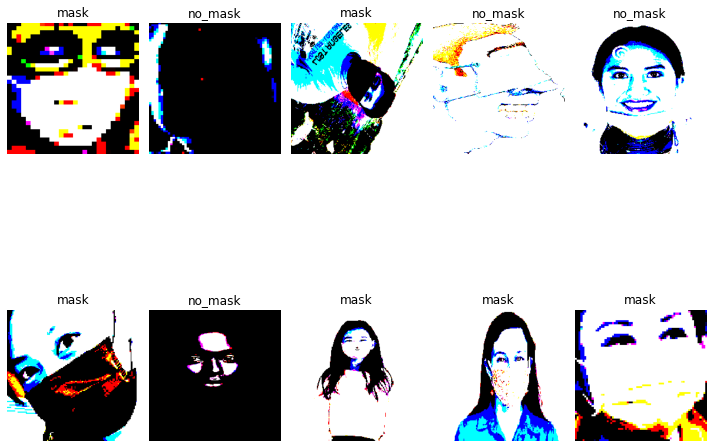

In [10]:
from src.plotting import showImages
showImages(imgs, labels)


In [11]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [12]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [13]:
# vgg16_model.summary()

In [23]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [24]:
# model.summary()

In [25]:
for layer in model.layers:
    layer.trainable = False

In [26]:
#freezes weights and biases for all layers in model... will it work for facemasks? 

In [27]:
model.add(Dense(units=2, activation='softmax'))

In [28]:
# model.summary()

In [29]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5


/Users/stellato/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


27/27 - 402s - loss: 0.5477 - accuracy: 0.7425 - val_loss: 0.4314 - val_accuracy: 0.8371
Epoch 2/5
27/27 - 335s - loss: 0.3019 - accuracy: 0.8862 - val_loss: 0.3256 - val_accuracy: 0.8652
Epoch 3/5
27/27 - 272s - loss: 0.2330 - accuracy: 0.9086 - val_loss: 0.2929 - val_accuracy: 0.8820
Epoch 4/5
27/27 - 263s - loss: 0.1975 - accuracy: 0.9291 - val_loss: 0.2699 - val_accuracy: 0.8820
Epoch 5/5
27/27 - 251s - loss: 0.1734 - accuracy: 0.9347 - val_loss: 0.2537 - val_accuracy: 0.8820


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

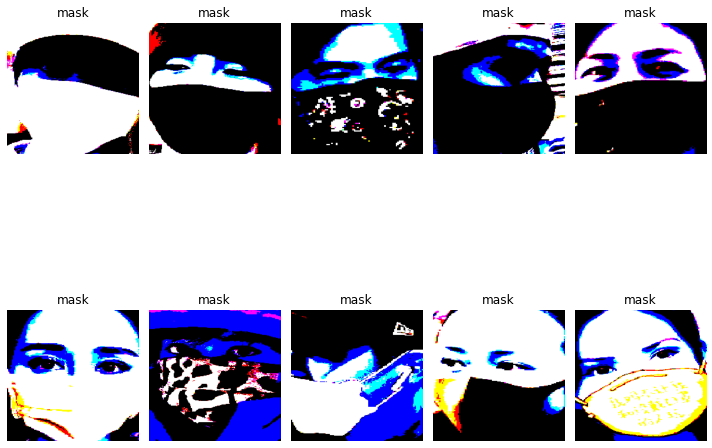

In [31]:
test_imgs, test_labels = next(test_batches)
showImages(test_imgs, test_labels)

In [32]:
#modified vgg16 sequential
model.evaluate(test_batches, verbose=True)

9/9 [==============================] - 61s 7s/step - loss: 0.2535 - accuracy: 0.9045


[0.2534971833229065, 0.9044944047927856]

In [33]:
predictions = model.predict(x=test_batches, verbose=0)

In [34]:
# predictions

In [35]:
# np.round(predictions)

In [36]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [37]:
from src.plotting import plot_confusion_matrix

Confusion matrix without normalization
[[91  6]
 [11 70]]


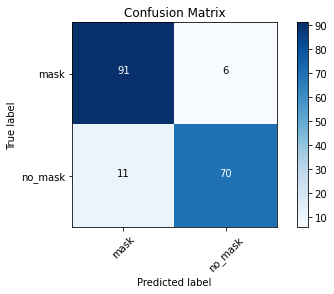

In [38]:
cm_plot_labels = ['mask', 'no_mask']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [40]:
# pwd
model.save('./vgg16_simple')

INFO:tensorflow:Assets written to: ./vgg16_simple/assets


In [41]:
# model.summary()

In [42]:
# for layer in model.layers[11]:
#     layer.trainable = True
model.layers[11].trainable = False

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [3]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined